<a href="https://colab.research.google.com/github/AbdulMoiz-MMY/Agentic_AI_Learning/blob/main/Langchain_Hlo_wrd__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get("GOOGLE_API_KEY")

In [2]:
!pip install -q -U langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 18.3 MB/s eta 0:00:00


In [3]:
!pip install -q -U langchain.google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.1 MB/s eta 0:00:00


In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate

In [5]:
First_prompt = PromptTemplate(
    input_variables = ["question"],
    template = "the key points of {question} in a clear and concise manner, focusing on the most important details. ",
)

Second_prompt = PromptTemplate(
    input_variables = ["first_response"],
    template = "read this {first_response} and summarize into Two lines promt for  relate image generation?",
)

Third_prompt = PromptTemplate(
    input_variables = ["second_response"],
    template = "generate the image {second_response} ?",
)


In [6]:
llm = ChatGoogleGenerativeAI(
    api_key = GEMINI_API_KEY,
    model = "gemini-1.5-flash",
    temperature = 0.5,
    max_output_tokens = 75

)

In [7]:
first_chain = First_prompt | llm
second_chain = Second_prompt | llm


In [8]:
import torch
from diffusers import StableDiffusionPipeline # Changed from StableDiffusion3Pipeline


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [9]:



first_response = first_chain.invoke({"question": input("Write the Question ?")})
print("First Chain",first_response.content)
second_response = second_chain.invoke({"first_response":first_response.content})
print("Second Chain ", second_response.content)

print()
print("Generate Image ")

# ... (rest of your code) ...

pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",) # Using the correct pipeline class for v1.4
if torch.cuda.is_available():
  pipe = pipe.to("cuda")

# ... (rest of your code) ...
image = pipe(second_response.content).images[0]

image.save("Find_generate_image.png")
print("Image Generate and saved as 'Find_generate_image.png'")


Write the Question ?what is machine learning
First Chain Machine learning (ML) is a type of artificial intelligence (AI) where computer systems learn from data without explicit programming.  Instead of relying on pre-defined rules, ML algorithms identify patterns, make predictions, and improve their performance over time based on the data they are exposed to.  The core idea is to build systems that can learn and adapt, enabling them to handle
Second Chain  Machine learning enables computers to learn from data and generate images without explicit programming.  This allows for the creation of novel and realistic images based on learned patterns and predictions.


Generate Image 


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image Generate and saved as 'Find_generate_image.png'


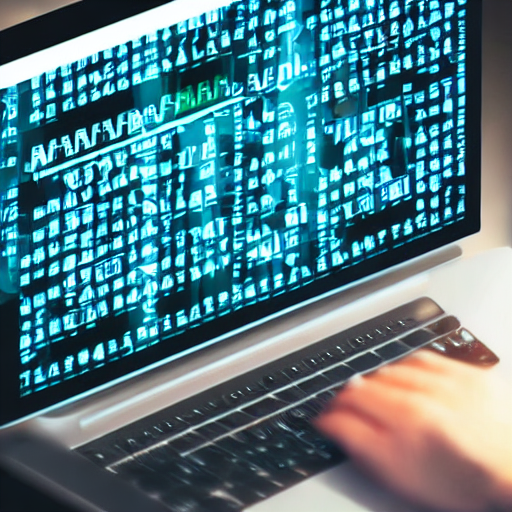

In [10]:
image